### <center> Python Code Used to Create Raw Data for Postgresql Database Insert
### <center> DTSC - 691 Capstone Database Project
### <center> Ryan Breen
### <center> Eastern University 
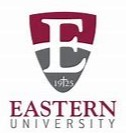 

## Table of Contents
### 1. [Background](#Background)  - Big Picture Behind Project  
### 2. [Data](#Data) - Python Code with Links to References 
### 3. [References](#References) - Links and Explanation for Methods Used to Develop Code

<a id="Background"></a>
## Background:

### Synopsis:

The following document contains various Python libraries used to fabricate mock data for a hypothetical laboratory company that is allows customers to order clinical laboratory test. In this mock company, data has been produce to represent all the customers, employees, equipment, orders, and transaction as organized below by _relational entities_ each entity with its key attributes. 
<br>
<br>
This company follows similar operational styles as Quest or Any-Lab-Test-Now where customers may order lab test online , receive a lab order form, have their blood drawn at a collection site located next to the laboratory. Results are then produced for laboratory test that customers pay for online. The data represents a week of data for this particular laboratory that is located solely within one hypothetical metropolitan area. The database design should aid in billing for customers, noting lab results that are outside of a range, as well as numerous view table functions that should create usability for different roles involed in the business.

<a id="Data"></a>
## Data:

### How Code is Organized :
 Raw data is created intentionally for to create each Entity table for the __Database Relational Schema__. This allows to easily insert data into each of the tables in the database and to easily debug this code if there is any problems with the insertion. Therfore, the python code is organized by each entity table then of course each attribute within each table. I use a Panda's dataframe to mimic a _relational table_ to create __.csv files__ with the Panda's `.to_csv()` method that will be used to insert each entity at a time into my Postgesql database PGADmin software.
#### Each Section is Modelled like such:
---
### Table: _Name of Table_ (n=_number of rows_, nulls=_number of nulls in table_ )
_Description of each entity to provide reader with familiarity prior to engaging the code_

#### attributes: 
#### _attribute1(attribute data type): [link to method explanation /source used to develop attribute code in last section]
#### attribute2..._if nothing listed code was manually entered_

` # attribute 1 - very brief description
attribute1 = some python code`
#### ...

`dataframe = some python code`

#### Note: No data was copied verbatim from any other sourche but I have included all references that aided in developing the concept behind each code line directly next to each listed out attribute. Attributes below without a 'Method' attached to it were simply created manual.

#### Standard Libraries:

In [60]:
import string
import pandas as pd
import numpy as np
import random
import csv

#### Function to convert csv to sql files:
The following function simply takes a .csv file, string formats each row to appear like a SQL INSERT statement, and output each line unto a text file. Note, a text file was choosen over a .sql file to conserve the encoding as 'utf-8' and to prevent any formatting issues caused by word pad, ect.

In [61]:
def csv_file(csv, sql="DDL_INSERT.txt"):
    ''' 1. imports csv dataframe as .csv
        2. converts each dataframe row to formatted string
        3. inserts formatted string as one line of a .txt (uft-8) file
        4. .txt(utf-8) file used as DDL INSERT statement '''

    import pandas as pd
    df = pd.read_csv(csv + ".csv", header=None)  # create df
    file = open(sql, "a")
    temp1 = []  # temp list to store row values
    temp2 = []  # temp list to store entire formatted row
    for cols in range(len(df)):
        for rows in df:
            if rows < (len(df.columns) - 1):  # all instances except last column are formatted as such
                temp1.append(f"'{df.iat[cols, rows]}',")
            if rows == (len(df.columns) - 1):  # when last column is reached, finish string formatting
                start = f"INSERT INTO {csv}\nVALUES("
                total = start + " ".join(temp1) + f"'{str(df.iat[cols, rows])}');\n"
                temp1.clear()
                temp2.append(total)
                del start
                del total
    for t in temp2:  # place formatted string = df row as one 'line' in the file
        print(t, file=file)

<a id="analyzers"></a>
---
### Table: analyzers (n=4, nulls=0 )
There are four analyzers listed below that perform testing on analytes. Analyzers perform test on patient samples using reagents. Reagents are represented in this database as analytes. Each analyzer contains specific panels (an array of many related analytes).

### Attributes (with source/reference if applicable):
#### serial_id(str)
#### make(str)
#### model(str)

In [62]:
### CREATE COLUMNS
# serial_id is sequenced list
serial_id = [f'SN{i}' for i in range(100000,200000,100)]
                                     
# analyzer makes
make =  ['Roche', 'Roche', 'ACL', 'Sysmex']
                                     
# analyzers models
model = ['Cobas_C', 'Cobas_I', 'Tops', 'H1000']

In [63]:
### CREATE DATAFRAME - dataframe is limited by
analyzers = list(zip(serial_id, make, model))
analyzers_df = pd.DataFrame(analyzers, columns=['serial_id','make','model'])
analyzers_df.to_csv('analyzers.csv', header = None, index = False)
analyzers_df

,serial_id,make,model
0,SN100000,Roche,Cobas_C
1,SN100100,Roche,Cobas_I
2,SN100200,ACL,Tops
3,SN100300,Sysmex,H1000


In [64]:
csv_file('analyzers')

<a id="QC_Profiles"></a>
---
### Table: QC_panels (n=27, nulls=0 )
Quality controls consist of three levels of controls (commericial fake blood with know values) that are run for each analyte. Furthermore, quality control is organized identical to analytes in the lab where analytes are orgainized by profiles. This is done commericially where analytes are grouped together by specific biotechnical processes. This is not necessary to know sepcifically; however, just know that each analyte for each level quality control belongs to one specific group called panel - these are identical to the 'QC panels'. These are the panels ordered by customers where each panel contains a specific group of analytes to be run. Note, no two panels have the same test - every panel is unique for quality control and for patients to be ordered. This is how quality control is arranged in the real-world.
unique for quality control and for patients to be ordered. This is how quality control is arranged in the real-world.
### Attributes (with source/reference if applicable):
#### QC_panel_id (str) &emsp; [Method 1](#section_ID1)
#### analyte_id (str) &emsp; [Method 1](#section_ID1)
#### serial_id (str) &emsp; [Method 1](#section_ID1)
#### panel_id (str) &emsp; [Method 1](#section_ID1)

In [65]:
### COLUMNS ### 
#QC_id
QC_panel_id = [str(i)  for i in range(100000,100027)]

#analyte_id - foreign key from analytes table to relate analyte name, ect
analyte_id= [str(i)  for i in range(100000,100027)]

#serial_id - foreign key from analytes table to relate analyte name, ect
serial_id= ['SN100000']*11+['SN100100']*8+['SN100300']*5+['SN100200']*3

#panel_id -  foreign key from analytes table to relate analyte name, ect
panel_id = [100000]*6+[100001]*5+[100002]*2+[100003]*2+[100004]*4+[100005]*5+[100006]*3

In [66]:
### DATAFRAME ###
QC_panels = list(zip(QC_panel_id,analyte_id,serial_id,panel_id))
QC_panels_df = pd.DataFrame(QC_panels, columns=['QC_panel_id','analyte_id','serial_id','panel_id'])
QC_panels_df.to_csv('QC_panels.csv', header = None, index = False)
QC_panels_df

,QC_panel_id,analyte_id,serial_id,panel_id
0,100000,100000,SN100000,100000
1,100001,100001,SN100000,100000
2,100002,100002,SN100000,100000
3,100003,100003,SN100000,100000
4,100004,100004,SN100000,100000
5,100005,100005,SN100000,100000
6,100006,100006,SN100000,100001
7,100007,100007,SN100000,100001
8,100008,100008,SN100000,100001
9,100009,100009,SN100000,100001


In [67]:
csv_file('QC_panels')

<a id="QC_Levels"></a>
---
### Table: QC_analytes (n=81, nulls=0 )  (27 analytes x 3 levels each)
Quality controls consist of three levels of controls (commericial fake blood with know values) that are run for each analyte. Furthermore, quality control is organized identical to analytes in the lab where analytes are orgainized by profiles. This is done commericially where analytes are grouped together by specific biotechnical processes. This is not necessary to know sepcifically; however, just know that each analyte for each level quality control belongs to one specific group called panel - these are identical to the 'QC panels'. These are the panels ordered by customers where each panel contains a specific group of analytes to be run. Note, no two panels have the same test - every panel is unique for quality control and for patients to be ordered. This is how quality control is arranged in the real-world.
### Attributes (with source/reference if applicable):
#### QC_analyte_id (str) &emsp; [Method 1](#section_ID1)
#### QC_panel_id(str):  [Method 1](#section_ID1)
#### QC_level (str)
#### manager_id(str)
#### QC_range_low (float) [Method 7](#section_ID7)
#### QC_mean (float)
#### QC_range_high (float) [Method 7](#section_ID7)

In [68]:
# QC_analyte_id - primary key for analytes
QC_analyte_id = [str(i)  for i in range(100000,100081)]

# QC_panel_id - to relate to QC_panel table - each panel_id can be thought of as an analyte
# each 'analyte' or panel_id should repeat 3 times in a row to correspond to each level of QC
QC_panel_id=[]
for i in range(100000,100027):
    for j in range(3):
        QC_panel_id.append(str(i))

#QC_level - 3 levels  for each of the 27 analytes
QC_level = ['1','2','3'] * 81

#manager_id 
manager_id = [str(100001)] * 81

#QC_mean  - entered manually (estimated from past experience)
# create mean values for each level (low, med, high) and merge list together
# normal level (2)
normal = [140,4,25,9,105,130,7,1,15,80,5,22,24,80,4.2,200,60,80,40,8,4.5,14,42,250,12,16,2]
# low qc is estimated to be around 80% below normal just for easibility
low = np.array(normal) * 0.80
# low qc is estimated to be around 120% abovenormal just for easibility
high = np.array(normal) * 1.20
# althernate the low, med, high levels to make sure we are in order in the dataframe
QC_mean=[]
for i,j,k in zip(low,normal,high):
    QC_mean.append(round(i,1))
    QC_mean.append(round(j,1))
    QC_mean.append(round(k,1)) 
#QC_range_low - entered manually (estimated from past experience)
# low range 20% below each individual level's mean
QC_range_low = np.round(np.array(QC_mean) - np.array(QC_mean)*0.1, 1)
#QC_range_high  - entered manually (estimated from past experience)
QC_range_high = np.round(np.array(QC_mean) + np.array(QC_mean)*0.1,1)

In [69]:
### DATAFRAME ###
QC_analytes = list(zip(QC_analyte_id, QC_panel_id, QC_level,manager_id,QC_range_low,QC_mean,QC_range_high))
QC_analytes_df = pd.DataFrame(QC_analytes, columns=['QC_analyte_id','QC_panel_id','QC_level','manager_id',
                                                    'QC_range_low','QC_mean','QC_range_high'])

QC_analytes_df.to_csv('QC_analytes.csv', header = None, index = False)
QC_analytes_df

,QC_analyte_id,QC_panel_id,QC_level,manager_id,QC_range_low,QC_mean,QC_range_high
0,100000,100000,1,100001,100.8,112.0,123.2
1,100001,100000,2,100001,126.0,140.0,154.0
2,100002,100000,3,100001,151.2,168.0,184.8
3,100003,100001,1,100001,2.9,3.2,3.5
4,100004,100001,2,100001,3.6,4.0,4.4
...,...,...,...,...,...,...,...
76,100076,100025,2,100001,14.4,16.0,17.6
77,100077,100025,3,100001,17.3,19.2,21.1
78,100078,100026,1,100001,1.4,1.6,1.8
79,100079,100026,2,100001,1.8,2.0,2.2


In [70]:
csv_file('QC_analytes')

---
### Table: QC_values (n=567, nulls=0 ) (81 individual QC 'tests'  * 7 days)
Again, the concept of keeping attributes uniquely discriminated to create normalization in the database is applied with the QC_values table to prevent possible data inconsistencies. The final product of ‘running Q.C.’ is that each  analyte should have 3 different levels of values (thought of as ‘low’, ‘normal’, ‘high’). These values are then determined if they are within a 2SD set mean and set standard deviation. The laboratory also tracks a running mean and running standard deviation to see how the quality control values compare to the set mean and standard deviation – this is a function that is created in the SQL database since it relies on dynamic data. There is data for each 81 possible quality control runs for every day that patient testing was resulted (simply take the result dates and pasted into code below and filled in the rest).

### Attributes (with source/reference if applicable):
#### QC_value_id (str): &emsp; [Method 1](#section_ID1)
#### QC_analyte_id(str): &emsp; [Method 1](#section_ID1)
#### QC_value (str) &emsp; [Method 5](#section_ID5)&emsp; [Method 7](#section_ID7)
#### QC_date (str) &emsp; [Method 1](#section_ID1)
#### QC_time (str) &emsp; [Method 1](#section_ID1)

In [71]:
# seed random results
np.random.seed(38)
random.seed(38)

# below we create 81 QC runs we do daily for 7 days thus a total 567 values

#QC_valus_id - each of the 27 panels * (3 levels each * 7 days)
QC_value_id = [str(i)  for i in range(100000,100567)] 


# QC_analyte_id - FK from QC_analyte table (81 individual QC 'tests' * 7 days)
QC_analyte_id = [str(i)  for i in range(100000,100081)]*7


#QC_value - here we can take the QC_means create above and 'insert it' in np.normal method
# this will create an array of normal values per each level mimicking actual results 
# we made our low and high QC values above +/- 20% from the mean...
# ... this hypothetically represents +/- 2 SD - random.normal requires 1SD so we cut in half..
# I will simply recursively introduce previous day's list (n=81) into np.normal
# the final 3 days I will tweak the list of qc values to artificial create a low trend 
# this is to test a function that will be created in SQL
day1 = [np.round(np.random.normal(m,m*0.1),1) for m in QC_mean]
day2 = [np.round(np.random.normal(m,m*0.1),1) for m in QC_mean]
day3 = [np.round(np.random.normal(m,m*0.1),1) for m in QC_mean]
day4 = [np.round(np.random.normal(m,m*0.1),1) for m in QC_mean]
# we will adjust two analytes from one qc (panel) (both two run lower to detect trending)
QC_mean[:2] = 108,136
day5 = [np.round(np.random.normal(m,m*0.1),1) for m in QC_mean]
day6 = [np.round(np.random.normal(m,m*0.1),1) for m in QC_mean]
day7 = [np.round(np.random.normal(m,m*0.1),1) for m in QC_mean]
QC_value = day1+day2+day3+day4+day5+day6+day7
# now to continue on 
# QC date and QC time: - 7 days of data
# create a scenario where dateetween 3/1/2022-3/7/2022
QC_date = [f'2022-03-0{d}'  for d in range(2,9) for i in range(81)]
# mimicks quality control running around 7 am each day
QC_time  = [f'7:1{m}' for m in range (0,9) for i in range(63)] 

In [72]:
### DATAFRAME ###
QC_values = list(zip(QC_value_id, QC_analyte_id,QC_value,QC_date,QC_time))
QC_values_df = pd.DataFrame(QC_values, columns=['QC_value_id','QC_analyte_id','QC_value',
                                                'QC_date','QC_time'])
QC_values_df.to_csv('QC_values.csv', header = None, index = False)
QC_values_df

,QC_value_id,QC_analyte_id,QC_value,QC_date,QC_time
0,100000,100000,123.3,2022-03-02,7:10
1,100001,100001,135.5,2022-03-02,7:10
2,100002,100002,170.1,2022-03-02,7:10
3,100003,100003,3.3,2022-03-02,7:10
4,100004,100004,4.5,2022-03-02,7:10
...,...,...,...,...,...
562,100562,100076,18.2,2022-03-08,7:18
563,100563,100077,16.7,2022-03-08,7:18
564,100564,100078,1.5,2022-03-08,7:18
565,100565,100079,1.9,2022-03-08,7:18


In [73]:
csv_file('QC_values')

<a id="containers"></a>
---
### Table:  containers (n=4 ,nulls=0 )
Containers contain samples. Containers come in different types based on the preservatives found in each container. Each container with different preservatives will have a different color rubber top. Containers with no preservatives have red top for example. The preservatives simply prevent the customer's blood from clotting for test that require measurement of constituents that would be otherwise found in the clot. Each container is used for one specific panel and each container therefore tied to one specific order. Barcodes are placed on each sample linking the customer and testing information to the sample.

The containers table serves as a dictionary for the database to elicit information associated to containers such as orders and samples. The use of foreign keys and functions in SQL will allow a phlebotomist view to display what container types are needed per each order. For example, if a CBC is ordered, a display will show the container requirements needed - a lavendar top tube filled with plasma, ect.
### Attributes (with source/reference if applicable):
#### container_id(str)
#### container_type(str)
#### container_color(str)
#### sample_type(str)

In [74]:
### CREATE COLUMNS
# container_id as shown:
container_id = [str(1000),str(1020),str(1040)]

# container_id as shown (only test tubes used for now, but leaves room if sample 'cups' needed:
container_type = ['tube'] * 4

# container_color (color of rubber top) as shown:
container_color = ['red','blue','lavendar']

# sample_type (only red tops create serum or liquid left after blood clots) as shown:
sample_type = ['serum', 'plasma','whole blood']

In [75]:
### CREATE DATAFRAME
containers = list(zip(container_id,container_type,container_color,sample_type))
containers_df = pd.DataFrame(containers, columns=['container_id','container_type',
                                                  'container_color','sample_type'])
containers_df.to_csv('containers.csv', header = None, index = False)
containers_df

,container_id,container_type,container_color,sample_type
0,1000,tube,red,serum
1,1020,tube,blue,plasma
2,1040,tube,lavendar,whole blood


In [76]:
csv_file('containers')

<a id="panels"></a>
___
### Table: panels (n=7 ,nulls=0 )
There are seven panels in the lab each contain multiple analytes (analytes listed in analytes table). A panel is an array of many analytes (i.e. LIVER panel contains many tests for liver function). No one panel is on two different analyzers at this laboratory. Note, all panels are unique and contain unique analytes not found on other panels (this is to reduce redundancy). Note, the charge for each panel is also kept within the table since a panel is the object that is ordered by the customer.
### Attributes (with source/reference if applicable):
#### panel_id(str)  &emsp; [Method 1](#section_ID1)
#### panel_name(str) 
#### container_id(str):
#### panel_charge(float)

In [77]:
# COLUMNS
# panel_id is sequenced list
panel_id = [str(i) for i in range (100000,100007)]

# correct containers corresponding 'its' associated panel
container_id = [str(1000)]*5+[str(1040)]+[str(1020)]

# names of panels (test panels contain 2-7 test each depending on panel)
panel_name = ['BMP', 'LIVER', 'RENAL', 'DIABETES', 'LIPID','CBC','COAG']

# cost of each panel respectively
panel_charge = [29.99, 34.49, 25.50, 45.00, 55.00,24.99,59.99]

In [78]:
# CREATE DATAFRAME
panels = list(zip(panel_id, panel_name, container_id, panel_charge))
panels_df = pd.DataFrame(panels, columns=['panel_id', 'panel_name', 'container_id','panel_charge'])
panels_df.to_csv('panels.csv', header = None, index = False)
panels_df

,panel_id,panel_name,container_id,panel_charge
0,100000,BMP,1000,29.99
1,100001,LIVER,1000,34.49
2,100002,RENAL,1000,25.50
3,100003,DIABETES,1000,45.00
4,100004,LIPID,1000,55.00
5,100005,CBC,1040,24.99
6,100006,COAG,1020,59.99


In [79]:
csv_file('panels')

<a id="analytes"></a>
___
### Table: analytes (n=27 ,nulls=0 )
Groups of analytes are found in specific panels. This table is representative of what is called "Test Definitions' in a laboratory that is literally manually entered by a lab manager as been so below. Each individual test that is found in the lab and important related information is listed to create a dictionary-like structure to be used for inheritance within the various functions of the database.

Analytes are 'what' can be tested for using the customer's blood sample. Analytes are synonymous with elements and molecules found in customer bloodstream (i.e. glucose analyte is used to test for glucose in bloodstream).Note, there is a specific reagent for each analyte. In fact, one may colloquially say place a "glucose on the analyzer" meaning put a glucose reagent on the analyzer not to be confused with one also saying "what is this customer's glucose level".

### Attributes (with source/reference if applicable):
#### analyte_id(str) &emsp; [Method 1](#section_ID1)
#### serial_id(str)
#### panel_id(str),
#### analyte_name(str)
#### analyte_mean(int)
##### analyte_sd(int,float)
#### units_of_measure(str)

In [80]:
# COLUMNS
# analyte_id is sequenced list
analyte_id = [str(i)  for i in range(100000,100027)]

# panel_id corresponds with correct test
panel_id = [100000]*6+[100001]*4+[100002]*2+[100003]*4+[100004]*4+[100005]*5+[100006]*2

# serial_id relates what analyzer the analyte runs on
serial_id = ['SN100000']*12+['SN100100']*8+['SN100300']*5+['SN100200']*2


# analyte names as seen on reports
analyte_name = ['SODIUM', 'POTASSIUM', 'BICARBONATE', 'CALCIUM', 'CHLORIDE', 'GLUCOSE',
                'PROTEIN','CREATININE', 'GFR', 'UREA NITROGEN',
                '2HRGTT','A1C',
                'AST','ALT', 'GGT', 'ALBUMIN' , 
                'CHOLESTEROL', 'TRIGLYCERIDE', 'LDL', 'HDL',
                'WBC', 'RBC', 'HEMOGLOBIN', 'HEMATOCRIT', 'PLATELET', 
                'PROTIME', 'APTT'] 
# average analyte value as tracked by laboratory
analyte_mean = [140,4,25,9,105,130,
                7,1,60,15,
                80,5,
                22,24,80,4.2,
                200,60,80,40,
                8,4.5,14,42,250,
                12,16]
# analyte_sd = 1% of the mean
analyte_sd = []
for means in analyte_mean:
    analyte_sd.append(round(means*0.01,2))

# unit of measure is measurement units relative to the ordered test - i.e. mg/dL 
units_of_measure = ['mmol/L', 'mmol/L', 'mmol/L', 'mg/dL', 'mmol/L', 'mg/dL',
                    'g/dL','mg/dL', 'mmol/L','mg/dL',
                    'mg/dL','mg/dL',
                    'U/L', 'U/L', 'U/L', 'g/dL', 
                    'mmol/L', 'mg/dL', 'g/dL', 'U/L', 
                    'U/L','/mL','g/dL', '%', '/mL', 
                    'sec', 'sec'] 

In [81]:
# CREATE g/L
analytes = list(zip(analyte_id, serial_id, panel_id, analyte_name, analyte_mean, 
                    analyte_sd, units_of_measure))
analytes_df = pd.DataFrame(analytes, columns=['analyte_id', 'serial_id', 'panel_id', 'analyte_name',
                                              'analyte_mean', 'analyte_sd','units_of_measure'])
analytes_df.to_csv('analytes.csv', header = None, index = False)
analytes_df

,analyte_id,serial_id,panel_id,analyte_name,analyte_mean,analyte_sd,units_of_measure
0,100000,SN100000,100000,SODIUM,140.0,1.40,mmol/L
1,100001,SN100000,100000,POTASSIUM,4.0,0.04,mmol/L
2,100002,SN100000,100000,BICARBONATE,25.0,0.25,mmol/L
3,100003,SN100000,100000,CALCIUM,9.0,0.09,mg/dL
4,100004,SN100000,100000,CHLORIDE,105.0,1.05,mmol/L
5,100005,SN100000,100000,GLUCOSE,130.0,1.30,mg/dL
6,100006,SN100000,100001,PROTEIN,7.0,0.07,g/dL
7,100007,SN100000,100001,CREATININE,1.0,0.01,mg/dL
8,100008,SN100000,100001,GFR,60.0,0.60,mmol/L
9,100009,SN100000,100001,UREA NITROGEN,15.0,0.15,mg/dL


In [82]:
csv_file('analytes')

<a id="orders"></a>
___
### Table: orders (n=1000,nulls=0 )
Orders are the keystone workhorse of the database and the laboratory. One order is used to link a patient to a panel the patient has purchased. Customers who order many panels will have an order for each of the panel including any duplicate panels (a patient may retest glucose levels). There are no insurance constraints so a patient may purchase as many panels at any given time albeit most will more than likely not. 

Every customer places one order for one lab panel. Lab panels or test panels contain many tests. i.e. LIVER panel contains many tests (AST, ALT, GGT...). Orders are the workhorse of the lab and in a database will contain many foreign keys linking important inter-relationships together. Here, we follow the classic lab order that links a panel(panel_id) with a specimen (barcode_id) with a customer(customer_id) and other relative information.
### Attributes (with source/reference if applicable):
#### order_id(str) &emsp; [Method 1](#section_ID1)
#### customer_id(str)&emsp;[Method 3](#section_ID3)
#### panel_id(str)  &emsp; [Method 1](#section_ID1)
#### order_date(str)&emsp;[Method 1](#section_ID1)
#### order_time(str)&emsp;[Method 1](#section_ID1)

In [83]:
# seed random results
np.random.seed(38)
random.seed(38)

### CREATE COLUMNS

# order_id is sequenced list
order_id = [str(i)  for i in range (100000,101000)]

# customer_id is sequenced list
customer_id = random.choices([str(i)  for i in range (100000,100500)], k = 1000)

# randomize panel_id to create randomly ordered test panels
panel_id = random.choices([str(i)  for i in range (100000,100007)],k=1000)


# order date and order time:

# create a scenario where datetimes are created for every minute between 2/21/22 and 2/27/22 
dates = [f'2022-02-2{d}'  for d in range(1,8)]
# iterate h hours and m minutes with repetes created from last loop
times = [f'{h}:{m}5' for h in range (0,24) for m in range(0,6)] 
# capture all the dates and times as combination of the two (inbedded for loops = combination)
order_date = []
order_time = []
for date in dates:
    for time in times:
        temp = (date,time)
        order_date.append(temp[0])
        order_time.append(temp[1])
        del temp
del dates,times

In [84]:
### CREATE DATAFRAME
orders = list(zip(order_id,customer_id, panel_id, order_date, order_time))
orders_df = pd.DataFrame(orders, columns=['order_id','customer_id','panel_id', 
                                          'order_date','order_time'])
orders_df.to_csv('orders.csv', header = None, index = False)
orders_df

,order_id,customer_id,panel_id,order_date,order_time
0,100000,100319,100006,2022-02-21,0:05
1,100001,100214,100006,2022-02-21,0:15
2,100002,100362,100006,2022-02-21,0:25
3,100003,100033,100002,2022-02-21,0:35
4,100004,100348,100003,2022-02-21,0:45
...,...,...,...,...,...
995,100995,100085,100006,2022-02-27,21:55
996,100996,100290,100005,2022-02-27,22:05
997,100997,100238,100005,2022-02-27,22:15
998,100998,100016,100005,2022-02-27,22:25


In [85]:
csv_file('orders')

<a id="charges"></a>
### Table: charges (n=1000 ,nulls=0 )
When a customer places an order a charge is created specific for a test panel (i.e. LIVER panel 34.49 USD). Charges more than likely will differ for each panel but do not have too – in other words, panels each typically have their own charge but do not have to. Payments for orders should match charges. A charge specific to each order. This information is kept separately from the orders table to _normalize_ the database so that when a change is made to a charge (i.e. discount) this change can be safely made and permutate the charge attribute appropriately.

### Attributes (with source/reference if applicable):
#### charge_id(str)&emsp;[Method 1](#section_ID1)
#### panel_id(str)&emsp;[Method 2](#section_ID2)
#### customer_id(str)&emsp;[Method 1](#section_ID1)
#### order_id(str)&emsp;[Method 1](#section_ID1)
#### reference: &emsp;[Method 3](#section_ID3)

In [86]:
# charge_id
charge_id = [str(i)  for i in range (100000,101000)]

# order_id
order_id = [str(i)  for i in range (100000,101000)]

# customer_id is sequenced list
customer_id = random.choices([str(i)  for i in range (100000,100500)], k = 1000)

#panel_id - 
# randomize panel_id to create randomly ordered test panels
panel_id = random.choices([str(i)  for i in range (100000,100007)],k=1000)

In [87]:
### CREATE DATAFRAME
charges = list(zip(charge_id, panel_id, order_id, customer_id))
charges_df = pd.DataFrame(charges, columns=['charge_id', 'panel_id','order_id', 'customer_id'])
charges_df.to_csv('charges.csv', header = None, index = False)
charges_df

,charge_id,panel_id,order_id,customer_id
0,100000,100000,100000,100442
1,100001,100004,100001,100312
2,100002,100004,100002,100004
3,100003,100001,100003,100489
4,100004,100003,100004,100155
...,...,...,...,...
995,100995,100004,100995,100312
996,100996,100004,100996,100099
997,100997,100004,100997,100024
998,100998,100002,100998,100003


In [88]:
csv_file('charges')

<a id="customer_tests"></a>
___
### Table: customer_tests (n=3821 ,nulls=0 )
The measuring of an analyte using the customer's blood (or other fluid) is considered a customer test. Again, each analyte that is tested is part of a specific and unique panel. The end product of a customer test is a customer result but sometimes a test may run without a result due to (i.e. a processing error). Test are performed on analyzers. A potential for a view log in the SQL database has been suggested to capture such instances. 

There are a 1000 orders within this raw data set. Each of these orders is for one test panel. Each of these panels contain many analytes - this is done because panels contain related groups of tests used to test for a specific organ(i.e. liver) or group of physiologically related items (all the cells in the blood stream). Although, some labs allow for individual test to be ordered individually, many labs in the real-world will use panels to eliminate waste, provide more complete care, and increase profitably by having more items charged at one time. From 1000 ordered panels there is 3821 analytes since each panel has multiple tests.
<br>
<br>
The reason this is mentioned is the panels must be converted to the test each panel contains. This conversion is done by linking panel names in the orders table to a panel names found in the analyte table. The analyte table serves as a dictionary where the dictionary entries are the analytes themselves atomically listed (no repeats) and each analyte listed in each row contains information such as what panel the analyte belongs to. In a database this is created using 'views' or 'queries' or 'foreign key constraints'. Here, each panel name found in orders is 'linked' to a panel name in the analytes table that then outputs what group of analytes need to be tested . Each analyte is given its own row and in similar fashion each order_id is also mapped from the original order to provide accountability.
<br>
<br>

### Attributes (with source/reference if applicable):
#### test_id(str)&emsp; [Method 1](#section_ID1)
#### employee_id(str) &emsp;[Method 1](#section_ID1)
#### analyte_id(str)&emsp; [Method 3](#section_ID3)
#### order_id(str)&emsp;[Method 3](#section_ID3)
#### result_id(str)&emsp;[Method 1](#section_ID1)

Please refer to __Method 3__ to derive information listed in the __Methodology__ section for information on how Panda's `str.contains()` function is combined with two dataframes and a for loop to crate a mapping function between two tables.


In [89]:
# seed random results
np.random.seed(38)
random.seed(38)

### CREATE COLUMNS

# test_id (need to find how many test ids to assign): 
test_id = [str(i)  for i in range (100000,103821)]

# employee_id - emulating 500 tests/employee shift with techs having IDs: (100020-100039)
e1 = [str(100020)]*500+[str(100021)]*500+[str(100022)]*500+[str(100023)]*500+[str(100024)]*500
e2 = [str(100025)]*500+[str(100026)]*500+[str(100026)]*321
employee_id = e1 +e2

# analyte_id:
# Here we map analyte_id an attribute found in analytes table to 'correspond' to the attribute panel_id
#...found in the orders table by relating panel_id found in both tables. We want to relate analyte_id to the
# ...the orders table because it dentoes what analytes should be run. Normally, the database  will handle
# ...this operation through foregin key constraints and SQL functions, but for now this is needed for 
# raw data. 
analyte_id=[]
for i,ele in orders_df['panel_id'].items():
    translation = analytes_df[analytes_df['panel_id'].map(str).str.contains(str(ele))]['analyte_id'].tolist()
    analyte_id.extend(translation)


# order_id:
# Customers place 1 order for 1 panel where a panel contains many analytes(tests)
# The analyzer will run one panel as each of its separate analytes(tests) per 1 order
# For example a Panel from 1 order with 3 tests - PanelX(test1(order1), test2(order1), test3(order1))
# The code below finds the order_id that corresponds to each tests (we want to trace a test to its order)
# To do this....
# We iterate through orders.panel_id row by row for each instance 'ele' (one particular panel id)
# We count the occurences of 'ele' in the analytes panel_id column
# The analytes table is a dictionary that literally list panels with all the anlaytes they contain
# Since, panels contain multiple analytes each panel id is multiplied by the number of analytes it contains
# Lets say panelx consist of 3 analytes, then we obviously find 3 occurence
# We then multiply the string 'order_id' in the SAME row as panel_id in the orders table by 3 
# Multiply a python string in a list creates three occurences of order_id
# These are extened in one grand final list  to create orders that correspond to ordered analytes


order_id = []
for n,ele in orders_df.loc[:,'panel_id'].items():
    multiplier = analytes_df.loc[:,'panel_id'].map(str).str.contains(str(ele)).value_counts()[True]
    multiplicand = orders_df.order_id[n]
    product = [multiplicand]*multiplier
    order_id.extend(product)
order_id


# result_id is sequential list - one result for each analytes
result_id = [str(i) for i in range (100000,103821)] 

In [90]:
### CREATE DATAFRAME
customer_tests = list(zip(test_id ,employee_id ,analyte_id ,order_id ,result_id ))
customer_tests_df = pd.DataFrame(customer_tests, columns=['test_id' ,'employee_id',
                                                        'analyte_id','order_id','result_id'])
customer_tests_df.to_csv('customer_tests.csv', header = None, index = False)
customer_tests_df

,test_id,employee_id,analyte_id,order_id,result_id
0,100000,100020,100025,100000,100000
1,100001,100020,100026,100000,100001
2,100002,100020,100025,100001,100002
3,100003,100020,100026,100001,100003
4,100004,100020,100025,100002,100004
...,...,...,...,...,...
3816,103816,100026,100004,100991,103816
3817,103817,100026,100005,100991,103817
3818,103818,100026,100010,100992,103818
3819,103819,100026,100011,100992,103819


In [91]:
csv_file('customer_tests')

<a id="customer_results"></a>
---
### Table: customer_results (n=3542 ,nulls=0 )
Results are the measurement value from the tested analyte using customer blood (fluid) and a reagent on an analyzer. Typically, biochemical or biophysical energy are measure that related very specifically to the presence of an analyte in a customers blood (usually a dye that changes color,ect). Each result given by the reaction from the analyte with a reagent is measured in specific units (i.e. mg/dL) that represents the amount of the analyte in the customers bloodstream (not in the test itself). To summarize, a customer places order for a panel for specific analytes that are tested and the customer gets results.

Each of the customer tests above must be resulted. Again, mapping to the analyzte table is used using the `str.contains()` method, but this time we use the analyte attribute as a common attribute between customer results and analyte table to map over the mean and sd that has been designate for each analyte. The mean and sd are used with `np.random.normal` to create the randomlly create results using the mean and sd from the analytes table.
### Attributes (with source/reference if applicable):
#### result_id(str)&emsp;[Method 1](#section_ID1)
#### customer_result(int,float)&emsp;[Method 3](#section_ID3)
#### result_date(str)&emsp;[Method 1](#section_ID1)
#### result_time(str)&emsp;[Method 1](#section_ID1)
#### reference: &emsp;[Method 3](#section_ID3)  &emsp;[Method 4](#section_ID4)

In [92]:
# seed random results
np.random.seed(38)
random.seed(38)

### CREATE COLUMNS

# result_id is sequential list
result_id = [str(i)  for i in range (100000,200000)]

#results
# results are values that corresponded to tests that in turn respond to an ordred panel
mean=[]
sd=[]
# again we turn to the map.str.contains methodology to use the analyte table has a mapping hash
# where everytime an anlayte is encounter in a patient test table the analyte find this value in the 
# analyte table and returns the corresponding row item for the attribute analyte_mean and analyte_sd
for k,ele in customer_tests_df['analyte_id'].items():
    translation1 = analytes_df[analytes_df['analyte_id'].str.contains(str(ele))]['analyte_mean'].tolist()
    translation2 = analytes_df[analytes_df['analyte_id'].str.contains(str(ele))]['analyte_sd'].tolist()
    mean.extend(translation1)
    sd.extend(translation2)
customer_result=[]
for m,s in zip(mean,sd):
    value = np.random.normal(m,s,1)  # most testing follows a normal distribution
    value = abs(value+0.1)
    customer_result.extend(np.round(value,1))

# result date and result time:
# create a scenario where datetimes are created for every minute between 3/1/2022-3/7/2022
dates = [f'2022-03-0{d}'  for d in range(2,9)]
# iterate h hours and m minutes with repetes created from last loop
times = [f'{h}:{m}5' for h in range (1,24) for m in range(0,6) for i in range(4)] 
# capture all the dates and times as combination of the two (inbedded for loops = combination)
result_date = []
result_time = []
for date in dates:
    for time in times:
        temp = (date,time)
        result_date.append(temp[0]) 
        result_time.append(temp[1])
        del temp
del dates,times

In [93]:
### CREATE DATAFRAME
customer_results = list(zip(result_id, customer_result, result_date, result_time))
customer_results_df = pd.DataFrame(customer_results, columns=['results_id','customer_result','result_date','result_time'])
customer_results_df.to_csv('customer_results.csv', header = None, index = False)
customer_results_df

,results_id,customer_result,result_date,result_time
0,100000,24.2,2022-03-02,1:05
1,100001,10.9,2022-03-02,1:05
2,100002,13.6,2022-03-02,1:05
3,100003,20.6,2022-03-02,1:05
4,100004,27.6,2022-03-02,1:15
...,...,...,...,...
3816,103816,114.5,2022-03-08,22:05
3817,103817,164.2,2022-03-08,22:05
3818,103818,144.8,2022-03-08,22:05
3819,103819,0.9,2022-03-08,22:05


In [94]:
csv_file('customer_results')

<a id="customers"></a>
### Table: customers (n=500 ,nulls=0 )
Customers purchase panels 'online' to be tested by the laboratory. Customers must have a sample collected for each panel in order for testing to be performed. A customer may order many panels without any constraint other than the customer must pay for each panel prior to testing.
### Attributes (with source/reference if applicable):
#### customer_id(str) &emsp;[Method 1](#section_ID1)
#### address_id(str)&emsp; [Method 1](#section_ID1)
#### phone_id(str) &emsp;[Method 1](#section_ID1)
#### email_id(str)&emsp; [Method 1](#section_ID1)
#### first_name(str)&emsp;[Method 4](#section_ID4)
#### last_name(str)&emsp; [Method 4](#section_ID4)
#### date_of_birth(str) &emsp;[Method 1](#section_ID1)

In [95]:
### CREATE COLUMNS
# customer_id is sequential list
customer_id = [str(i) for i in range (100000,100500)]

# address_id is sequential list
address_id = [str(i) for i in range (100000,100500)]

# phone_id is sequential list - customers are first 500 enteries for all contacts
phone_id = [str(i) for i in range (100000,100500)]

# email_id is sequential list
email_id = [str(i) for i in range (100000,100500)]

# first name of patient where name i.e. Michael = M*** (did not want to create 'accidentally' real names)
first_name = [f'{(2*string.ascii_uppercase)[i]}*****' for i in np.random.randint(1,26,1000)]

# last name of patient where name i.e. Jordan = J*** (did not want to create 'accidentally' real names)
last_name = [f'{(2*string.ascii_uppercase)[i]}*****' for i in np.random.randint(1,26,1000)]


# date_of_birth:
# 1000 randomly choosen months as integers
days = [str(i) for i in np.random.randint(1,28,1000)]
# 1000 randomly choosen days(1-28) as integers
months = [str(i) for i in np.random.randint(1,13,1000)]
# 1000 randomly choosen years (1920-2021) as integers
years = [str(i) for i in np.random.randint(1920,2022,1000)] 
# placed in year-month-day format
date_of_birth = [f'{y}-{m}-{d}' for y,m,d in zip(years,months, days)]                                             

In [96]:
### CREATE DATAFRAME
customers = list(zip(customer_id, address_id, phone_id, email_id, first_name, last_name, date_of_birth))
customers_df = pd.DataFrame(customers, columns=['customer_id', 'address_id', 'phone_id', 'email_id', 
                                                'first_name', 'last_name', 'date_of_birth'])
customers_df.to_csv('customers.csv', header = None, index = False)
customers_df

,customer_id,address_id,phone_id,email_id,first_name,last_name,date_of_birth
0,100000,100000,100000,100000,N*****,P*****,1950-2-5
1,100001,100001,100001,100001,N*****,I*****,1940-6-24
2,100002,100002,100002,100002,T*****,G*****,1939-10-24
3,100003,100003,100003,100003,E*****,Q*****,1979-3-20
4,100004,100004,100004,100004,X*****,D*****,1944-10-19
...,...,...,...,...,...,...,...
495,100495,100495,100495,100495,P*****,W*****,1977-3-9
496,100496,100496,100496,100496,P*****,N*****,1928-12-9
497,100497,100497,100497,100497,X*****,L*****,1966-6-9
498,100498,100498,100498,100498,I*****,F*****,1975-9-21


In [97]:
csv_file('customers')

<a id="samples"></a>
___
### Table: samples (n=1000 ,nulls=0 )
A customer has their body fluids (more than likely blood) collected in containers (tubes) by lab employees called phlebotomist. The customer sample (within a container) is then subjugated for testing for an analyte on an analyzer.  Each sample is given a unique barcode number so that the data pertain to the sample can be tracked or read by analyzers. Each order requires one sample and if more than one order is given for a customer than a sample is required for each order. If a customer does not have enough sample to run than a barcode number is still assigned and is used to track samples that were unable to be obtained as handled by functions in the SQL database. If multiple orders require the same type of tube a unique barcode is still created for each order – the lab can simply aliquot a sample into an empty tube and label the second tube with the other barcode. 

### Attributes (with source/reference if applicable):
#### barcode_id(str)&emsp;[Method 1](#section_ID1)
#### order_id(str)&emsp;[Method 1](#section_ID1)
#### employee_id(str)&emsp;[Method 2](#section_ID2)
#### customer_id(str)&emsp;[Method 1](#section_ID1)
#### collection_date(str)&emsp;[Method 1](#section_ID1)
#### collection_time(str)&emsp;[Method 1](#section_ID1)

In [98]:
# seed random results
np.random.seed(38)
random.seed(38)

### CREATE COLUMNS
# barcode is just a sequential list (1000 orders = 1000 barcodes)
barcode_id = [str(i) for i in range (100000,101000)]

# order_id is sequenced list
order_id = [str(i)  for i in range (100000,101000)]

# first 20 employees are specimen collectors - these are randomly choosen 1000x
employee_id = random.choices([i for i in range (100000,100020)], k=1000)

# customer_id - customers sorted by customer_ids in orders
customer_id = random.choices([str(i)  for i in range (100000,100500)], k = 1000)

# collection date and collection time:

# create a scenario where datetimes are created for every minute between 03/01/22 and 03/07/22 
dates = [f'2022-03-0{d}'  for d in range(1,8)]

# iterate h hours and m minutes with repetes created from last loop
times = [f'{h}:{m}5' for h in range (1,24) for m in range(0,6) for i in range(2)] 

# capture all the dates and times as combination of the two (inbedded for loops = combination)
collection_date = []
collection_time = []
for date in dates:
    for time in times:
        temp = (date,time)
        collection_date.append(temp[0]) 
        collection_time.append(temp[1])
        del temp
del dates,times

In [99]:
### CREATE DATAFRAME
samples = list(zip(barcode_id, order_id, employee_id, customer_id, collection_date, collection_time))
samples_df = pd.DataFrame(samples, columns=['barcode_id', 'order_id', 'employee_id', 'customer_id',
                                            'collection_date' , 'collection_time'])
samples_df.to_csv('samples.csv', header = None, index = False)
samples_df

,barcode_id,order_id,employee_id,customer_id,collection_date,collection_time
0,100000,100000,100012,100431,2022-03-01,1:05
1,100001,100001,100008,100459,2022-03-01,1:05
2,100002,100002,100014,100453,2022-03-01,1:15
3,100003,100003,100001,100183,2022-03-01,1:15
4,100004,100004,100013,100242,2022-03-01,1:25
...,...,...,...,...,...,...
995,100995,100995,100003,100446,2022-03-04,14:55
996,100996,100996,100011,100414,2022-03-04,15:05
997,100997,100997,100009,100387,2022-03-04,15:05
998,100998,100998,100000,100393,2022-03-04,15:15


In [100]:
csv_file('samples')

<a id="employees"></a>

---
### Table: employees (n=40 , manager_id column = 38 null values )
Employees work at the laboratory or the collection center located at the laboratory. Employees are may be techs who run test on patient samples utilizing analyzers to create results (result automatically cross over from instrument) – techs work in the laboratory. Employees may also be phlebotomist who obtain samples in containers who work in the specimen collection department. There are 40 employees currently at this laboratory that represents a moderate size operation. There are are two lab managers at this laboratory that are listed in both the employees table as an employee but also referenced in a managers table. Note, each employee reports to one manager only.

A table  of 40 employees with encrypted names (note: names are mock names). The first 20 employees are specimen collectors and the remaining work in the laboratory (techs). Each employee reports to one and only one manager and there is two managers working in the laboratory.
### Attributes (with source/reference if applicable):
#### employee_id(str)&emsp;[Method 1](#section_ID1)
#### location_site (str)&emsp;[Method 1](#section_ID1)
#### certification(str)&emsp;[Method 1](#section_ID1)
#### email_id(str)&emsp;[Method 1](#section_ID1)
#### phone_id(str)&emsp;[Method 1](#section_ID1)
#### address_id(str)&emsp;[Method 1](#section_ID1)
#### record_id(str)&emsp;[Method 1](#section_ID1)
#### manager_id(str)&emsp;[Method 1](#section_ID1)
#### first_name(str)&emsp;[Method 4](#section_ID4)
#### last_name(str)&emsp;[Method 4](#section_ID4)

In [101]:
### CREATE COLUMNS
# employee_id sequential list
employee_id = [str(i) for i in range (100000,100040)]

# collection_site - a list of locations where 'lab collectors work' as address_id (FK)
# 20 collectors...5 locations split evenly.. lab collectors first 20 employees 
# techs all work on main site where 4 collectors work as well (# 100545)
# location 100545 will serve as the main laboratory with a collection site on site
location_site = [str(100541)]*4+[str(100542)]*4+[str(100543)]*4+[str(100544)]*4+[str(100545)]*24

# certification - al list of certifications or lack of for 'lab techs
# 20 lab tech where half our certified - lab techs are the last 20 employees
# ASCP certifying board of lab techs - function in SQL will give pay raise to those certified
certification = [np.nan]*20 + ['ASCP']*10 + [np.nan]*10

# email_id corresponds to email in email table for employees
email_id =  [str(i) for i in range (100500,100540)] 

# phones_id corresponds to phone in phone table for employees
phone_id =  [str(i) for i in range (100500,100540)] 

# address_id corresponds to personal addresses in address table for employees
address_id = [str(i) for i in range (100500,100540)] 

# record_id corresponds to employee records in record table
record_id = [str(i) for i in range (100000,100040)]

# manager_id corresponds to manager id given to two employees 
# note one manager works in specimen processing which is the first employee
# note one manager works in the laboratory which is listed as the last employee
# 1 manager, 19 specimen collectors, 19 lab techs, 1 manager
manager_id = [str(100000)]+['Not Applicable']*38+[str(100001)] #nan used in lieu np.nan b/c numpy casts integers as floats!!

# first names = randomly selected capital letter followed by ****
first_name = [f'{(2*string.ascii_uppercase)[i]}*****' for i in np.random.randint(1,26,40)]
# last names = randomly selected capital letter followed by ****
last_name = [f'{(2*string.ascii_uppercase)[i]}*****' for i in np.random.randint(1,26,40)]


In [102]:
### CREATE DATAFRAME
employees = list(zip(employee_id,location_site, certification, email_id,phone_id,
                              address_id,record_id,manager_id,first_name,last_name))
employees_df = pd.DataFrame(employees, columns=['employee_id','location_site',
                                                                  'certification','email_id','phone_id',
                                                                  'address_id', 'record_id', 'manager_id',
                                                                  'first_name','last_name'])
employees_df.to_csv('employees.csv', header = None, index = False)
employees_df

,employee_id,location_site,certification,email_id,phone_id,address_id,record_id,manager_id,first_name,last_name
0,100000,100541,NaN,100500,100500,100500,100000,100000,C*****,T*****
1,100001,100541,NaN,100501,100501,100501,100001,Not Applicable,M*****,E*****
2,100002,100541,NaN,100502,100502,100502,100002,Not Applicable,W*****,W*****
3,100003,100541,NaN,100503,100503,100503,100003,Not Applicable,U*****,O*****
4,100004,100542,NaN,100504,100504,100504,100004,Not Applicable,F*****,K*****
5,100005,100542,NaN,100505,100505,100505,100005,Not Applicable,D*****,I*****
6,100006,100542,NaN,100506,100506,100506,100006,Not Applicable,C*****,N*****
7,100007,100542,NaN,100507,100507,100507,100007,Not Applicable,Y*****,C*****
8,100008,100543,NaN,100508,100508,100508,100008,Not Applicable,R*****,L*****
9,100009,100543,NaN,100509,100509,100509,100009,Not Applicable,L*****,V*****


In [103]:
csv_file('employees')

<a id="managers"></a>
___
### Table:mangers (n=3 ,nulls=0 )
The laboratory has two managers. One managers managers all the employees who work in the specimen collection department(‘phlebotomist’). This manager also is listed as working in ‘specimen collection’ as well. All employees in specimen collection therefore have one and only one manager. Another manager manages all employees who work in the laboratory (‘techs’).  This manager is listed as working in the ‘laboratory’ for department location and all laboratory employees only report to the one manager. 
#### attributes: 
#### manager_id(str) 

In [104]:
# COLUMNS
# manager_id - needed to add 'Not Applicable' for non-managers or FK constraint will be violated in 'employees'
manager_id = [str(100000),str(100001),'Not Applicable']

In [105]:
### CREATE DATAFRAME
managers = manager_id
managers_df = pd.DataFrame(managers, columns=['manager_id'])
managers_df.to_csv('managers.csv', header = None, index = False)
managers_df

,manager_id
0,100000
1,100001
2,Not Applicable


In [106]:
csv_file('managers')

<a id="employment_records"></a>
___
### Table:employement_records (n=40 ,nulls=0 )
Department and salary info for 40 employees.
### Attributes (with source/reference if applicable):
#### record_id(str)&emsp;[Method 1](#section_ID1)
#### department(str) 
#### salary(str)&emsp;[Method 2](#section_ID2)

In [107]:
# seed random results
np.random.seed(38)
random.seed(38)

### CREATE COLUMNS
# record_id - PK for employment_records
record_id = [str(i) for i in range (100000,100040)]
# department column
department = ['specimen collection']*20 + ['laboratory']*20

# salary column:

# salary for collectors and techs
collectors = list(random.choices(list(range(30000,35000,800)),k=20))
techs = list(random.choices(list(range(50000,65000,800)),k=20))
salary =  collectors + techs

In [108]:
### CREATE DATAFRAME
employment_records = list(zip(record_id, department, salary))
employment_records_df = pd.DataFrame(employment_records, columns=['record_id','department','salary'])
employment_records_df.to_csv('employment_records.csv', header = None, index = False)
employment_records_df

,record_id,department,salary
0,100000,specimen collection,33200
1,100001,specimen collection,32400
2,100002,specimen collection,34000
3,100003,specimen collection,30000
4,100004,specimen collection,33200
5,100005,specimen collection,31600
6,100006,specimen collection,33200
7,100007,specimen collection,30800
8,100008,specimen collection,31600
9,100009,specimen collection,30800


In [109]:
csv_file('employment_records')

<a id="addresses"></a>
___
### Table: addresses (n=545 ,nulls=0 )
Addresses for 40 employees, 5 collection sites(to obtain samples), and 500 customers
### Attributes (with source/reference if applicable):
#### address_id(str)&emsp;[Method 2](#section_ID2)
#### street_ number(str)&emsp;[Method 2](#section_ID2)
#### street_name(str)&emsp;[Method 2](#section_ID2)
#### street_suffix(str)&emsp;[Method 2](#section_ID2)
#### city(str)&emsp;[Method 2](#section_ID2)
#### state(str)
#### zip_code(str)
#### source (converters): https://stackoverflow.com/questions/13250046/how-to-keep-leading-zeros-in-a-column-when-reading-csv-with-pandas

In [110]:
# seed random results
np.random.seed(38)
random.seed(38)

### CREATE COLUMNS
# addreess_id is a sequential list
address_id = [str(i) for i in range (100000,100545)]

# street address - includes number and road:
# street number
street_number = random.choices(list(range(1000)),k=545) 
# streets named after trees (mostly)
street_name = random.choices(['Maple','Elm','Oak','Main','Cedar','Spruce','Pine','Beech'],k=545)
# street suffices - i.e. Road, Street, ect...
street_suffix = random.choices(['St.','Ave.','Rd.','Way'],k=545)

# mock cities below
city = random.choices(['Dairy City','Skitown','Snowdon','Leaf Village','Tacoville','Syrupville'],k=545)
# mock state below
state = ['Vermontsylvania']*545
# zip codes corresponding to mock
zip_code = random.choices(['11011','11015','11025','11024','11017','11100'],k=545)
zip_code = pd.Series(zip_code).astype(str)

In [111]:
### CREATE DATAFRAME
addresses = list(zip(address_id, street_number, street_name, street_suffix, 
                     city, state, zip_code))
addresses_df = pd.DataFrame(addresses, columns=['address_id','street_number','street_name',
                                                'street_suffix', 'city','state','zip_code']).astype('object')
addresses_df.to_csv('addresses.csv', header = None, index = False)
addresses_df

,address_id,street_number,street_name,street_suffix,city,state,zip_code
0,100000,639,Maple,St.,Skitown,Vermontsylvania,11100
1,100001,429,Oak,Way,Syrupville,Vermontsylvania,11011
2,100002,724,Cedar,St.,Tacoville,Vermontsylvania,11100
3,100003,66,Elm,Rd.,Snowdon,Vermontsylvania,11011
4,100004,697,Maple,St.,Snowdon,Vermontsylvania,11100
...,...,...,...,...,...,...,...
540,100540,674,Cedar,Way,Syrupville,Vermontsylvania,11015
541,100541,445,Elm,Way,Skitown,Vermontsylvania,11024
542,100542,459,Maple,Ave.,Dairy City,Vermontsylvania,11024
543,100543,474,Elm,St.,Tacoville,Vermontsylvania,11015


In [112]:
csv_file('addresses')


___
### Table: email_addresses (n=540 ,nulls= 0)
Personal email addresses for 40 employees and 500 customers 
### Attributes (with source/reference if applicable):
#### email_id(str)&emsp;[Method 1](#section_ID1)
#### email(str)&emsp;[Method 2](#section_ID2)

In [113]:
# seed random results
np.random.seed(38)
random.seed(38)

### CREATE COLUMNS
# email_id is a sequential list
email_id = [str(i) for i in range (100000,100540)]

# email
# 5 randomly selected letters using the chr() function (converts int -> str using ascii)
alphanums = list('01234567890123456789012345abcdefghijklmnopqrstuvqxyz')
l1 = random.choices(alphanums,weights=[3,2,4,1]*13, k = 540)
l2 = random.choices(alphanums,weights=[1,2,3,4]*13, k = 540) # each 540 items can be assigned a weight
l3 = random.choices(alphanums,weights=[1,4,2,3]*13, k = 540)
l4 = random.choices(alphanums,weights=[4,1,3,1]*13, k = 540)
l5 = random.choices(alphanums,weights=[2,1,3,4]*13, k = 540)
email=[]
for a,b,c,d,e in zip(l1, l2, l3, l4, l5): # here we zip through 5 randomized list to create 5 string emails
    email.append(f"{a}{b}{c}{d}{e}@fakemail.fake")

In [114]:
### CREATE DATAFRAME
email_addresses = list(zip(email_id, email))
email_addresses_df = pd.DataFrame(email_addresses, columns=['email_id', 'email'])
email_addresses_df.to_csv('email_addresses.csv', header = None, index = False)
email_addresses_df

,email_id,email
0,100000,hj9nm@fakemail.fake
1,100001,23aa9@fakemail.fake
2,100002,l322u@fakemail.fake
3,100003,25403@fakemail.fake
4,100004,kqxn8@fakemail.fake
...,...,...
535,100535,5r314@fakemail.fake
536,100536,7fhf7@fakemail.fake
537,100537,2rv48@fakemail.fake
538,100538,cq034@fakemail.fake


In [115]:
csv_file('email_addresses')

<a id="phone_numbers"></a>
___
### Table: phone_numbers (n=540 ,nulls=0 )
Phone numbers for 40 employees and 500 customers.
#### attributes: 
#### phone_id(str) &emsp;[Method 1](#section_ID1)
#### phone_number(str)&emsp; [Method 1](#section_ID1)

In [116]:
### CREATE COLUMNS
# email_id is a sequential list
phone_id = [str(i) for i in range(100000,100540)]
# random fake numbers without duplicates 
phone_number = [f'555-555-{i}' for i in random.sample(range(1000,9999),540)]

In [117]:
### CREATE DATAFRAME
phone_numbers = list(zip(phone_id, phone_number))
phone_numbers_df = pd.DataFrame(phone_numbers, columns=['phone_id', 'phone_number'])
phone_numbers_df.to_csv('phone_numbers.csv', header = None, index = False)
phone_numbers_df

,phone_id,phone_number
0,100000,555-555-2906
1,100001,555-555-4201
2,100002,555-555-9830
3,100003,555-555-6416
4,100004,555-555-6816
...,...,...
535,100535,555-555-2228
536,100536,555-555-7208
537,100537,555-555-6630
538,100538,555-555-4632


In [118]:
csv_file('phone_numbers')

___
___
<a id="References"></a>
## References:
The following section documents and sources major methods used to create random arrays of data. Where they are used throughout the document, they are sourced here. A brief explanation is given below each function as a primer to understanding its use in the code in the Data section. Attributes 1 - 6 are generalizations of how one attribute or column would be created using such methods. Originally, this was meant to be a reference section, but what is the point of reading all the code without a background in the major constituents of such code.
<a id="section_ID1"></a>
#### Method 1:
` attribute1 = [f'prefix{i} for i in range(1000,2000)]`
<br>
#### source: https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions
<br>
<br>
Both `list comprehension` and `string formatting` from Python allow dynamic creation in this case of string data that contains numeric data included in the string case within a user specified range. Random string values may also be inserted with the f' string case' by created a list of strings or using Pythons string library.

---
<a id="section_ID2"></a>
#### Method 2:
`attribute2 = random.choices(choice_list=['sm','med','lg', weights =[a,b,c], k = 1000)`: 

#### source:  https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
<br>
<br>
The `random.choices` method inputs a list of choices that may be weighted by a corresponding list of weights. Therefore the choice_list and weights list must be equal in length. The 'weights' argument defaults to applying equal weighting to all elements that is useful for very large choice lists. Finally, the 'k' argument denotes the final size of the array you wish to create, above an array of length 1000 is choosen.

---
<a id="section_ID3"></a>
#### Method 3:

` for ele in df1['shared_col'].items():
       attribute3 = df2[df2['shared_col'].map(str).str.contains(str(ele))]['output_col'].tolist()`

#### source(`str.contains`): https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html

#### sources(`.map()`):  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html

#### sources(`tolist()`): https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.tolist.html
<br>
Note: the entire code statement was compiled on my own accord.
<br>   

The `str.contains` method for pandas allows one to obtain the indices for a search string value within a Pandas dataframe column. These returned indices may be used in a filter 'mask' that simply uses the indices for another column within the same dataframe. Essentially, this is stating that we can get row instances from one column relative to another column. 
<br>
<br>
Cleverly, if two dataframes have have columns that are the same (contain the same instances), one can iterate through first dataframe shared column with a for loop to obtain each of the elements within the column, insert such elements as arguments for `str.contains`, but do so by searching in the shared column in the second dataframe. Furthermore, as originally stated `str.contains` simply returns indices of the matching instances - These indices may be used for another column within the second dataframe. 
<br>
<br>
Note, the other constituents of the method `.map(str)` is simply used to ensure only maps the all values in the dataframe column as string values since `str.contains()` only works with string data. `.map` is __not__ doing any of the mapping between each of the dataframes.  The `.tolist()` of course convers statement into a list format useful to 'capture' multiple instances during each iteration.

---
<a id="section_ID4"></a>
#### Method 4:
` np.random.randint(a,b,n)`

#### source: https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html

Numpy ` np.random.randint(a,b,n)` allows for a range of numbers between a, b and creates an array of n size.
<br>
<br>

---
 <a id="section_ID5"></a>
#### Method 5:
` np.random.normal(mu,sigma,n)`

#### source: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

Numpy randomly creates normalized values by inserted in a mean value (mu), a standard deviation (sigma), and the number of values desired (n). This function is primarily for created test results in this database. 
<br>
<br>

---
 <a id="section_ID6"></a>
#### Method 6:
`np.random.seed(38)`
#### source: https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html

Although, data was not directly created from the `np.random.seed(38)` 'method', the method is references to since it plays a __extremely__ vital role in reproducing similar values. 
___

Although, data was not directly created from the `np.random.seed(38)` 'method', the method is references to since it plays a __extremely__ vital role in reproducing similar values. 

---
 <a id="section_ID7"></a>
#### Method 7:
`i.e. np.array() * scalar`
For each element within an array , arithmetic operations may be performed. Arrays themselves may also be constituents within arithmetic operations commonly refered to as _vector operations_.
 
#### source: https://numpy.org/doc/stable/user/basics.broadcasting.html

___
___
<a id="References"></a>
## References:
The following section documents and sources major methods used to create random arrays of data. Where they are used throughout the document, they are sourced here. A brief explanation is given below each function as a primer to understanding its use in the code in the Data section. Attributes 1 - 6 are generalizations of how one attribute or column would be created using such methods. Originally, this was meant to be a reference section, but what is the point of reading all the code without a background in the major constituents of such code.
<a id="section_ID1"></a>
#### Method 1:
` attribute1 = [f'prefix{i} for i in range(1000,2000)]`
<br>
#### source: https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions
<br>
<br>
Both `list comprehension` and `string formatting` from Python allow dynamic creation in this case of string data that contains numeric data included in the string case within a user specified range. Random string values may also be inserted with the f' string case' by created a list of strings or using Pythons string library.

---
<a id="section_ID2"></a>
#### Method 2:
`attribute2 = random.choices(choice_list=['sm','med','lg', weights =[a,b,c], k = 1000)`: 

#### source:  https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
<br>
<br>
The `random.choices` method inputs a list of choices that may be weighted by a corresponding list of weights. Therefore the choice_list and weights list must be equal in length. The 'weights' argument defaults to applying equal weighting to all elements that is useful for very large choice lists. Finally, the 'k' argument denotes the final size of the array you wish to create, above an array of length 1000 is choosen.

---
<a id="section_ID3"></a>
#### Method 3:

` for ele in df1['shared_col'].items():
       attribute3 = df2[df2['shared_col'].map(str).str.contains(str(ele))]['output_col'].tolist()`

#### source(`str.contains`): https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html

#### sources(`.map()`):  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html

#### sources(`tolist()`): https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.tolist.html
<br>
Note: the entire code statement was compiled on my own accord.
<br>   

The `str.contains` method for pandas allows one to obtain the indices for a search string value within a Pandas dataframe column. These returned indices may be used in a filter 'mask' that simply uses the indices for another column within the same dataframe. Essentially, this is stating that we can get row instances from one column relative to another column. 
<br>
<br>
Cleverly, if two dataframes have have columns that are the same (contain the same instances), one can iterate through first dataframe shared column with a for loop to obtain each of the elements within the column, insert such elements as arguments for `str.contains`, but do so by searching in the shared column in the second dataframe. Furthermore, as originally stated `str.contains` simply returns indices of the matching instances - These indices may be used for another column within the second dataframe. 
<br>
<br>
Note, the other constituents of the method `.map(str)` is simply used to ensure only maps the all values in the dataframe column as string values since `str.contains()` only works with string data. `.map` is __not__ doing any of the mapping between each of the dataframes.  The `.tolist()` of course convers statement into a list format useful to 'capture' multiple instances during each iteration.

---
<a id="section_ID4"></a>
#### Method 4:
` np.random.randint(a,b,n)`

#### source: https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html

Numpy ` np.random.randint(a,b,n)` allows for a range of numbers between a, b and creates an array of n size.
<br>
<br>

---
 <a id="section_ID5"></a>
#### Method 5:
` np.random.gamma(mu,sigma,n)`

#### source: https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html

Numpy randomly creates nearly normal values by inserted in a mean value (mu), a standard deviation (sigma), and the number of values desired (n). This function is primarily for created test results in this database. The gamma distribution is nearly analogous to the normal distribution with positive numbers only.
<br>
<br>

---
 <a id="section_ID6"></a>
#### Method 6:
`np.random.seed(38)`
#### source: https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html

Although, data was not directly created from the `np.random.seed(38)` 'method', the method is references to since it plays a __extremely__ vital role in reproducing similar values. 
___

Although, data was not directly created from the `np.random.seed(38)` 'method', the method is references to since it plays a __extremely__ vital role in reproducing similar values. 

---
 <a id="section_ID8"></a>
#### Method 8:
`order_id = []
for n,ele in orders_df.loc[:,'panel_id'].items():
    multiplier = analytes_df.loc[:,'panel_id'].map(str).str.contains(str(ele)).value_counts()[True]
    multiplicand = orders_df.order_id[n]
    product = [multiplicand]*multiplier
    order_id.extend(product)
order_id`
<br>
The general idea here is that for each instance iterated in one column we count the number of occurences in another similar column (same column attribute different table). The column in the other table that is being counted is contained in a table that represents a dictionary. In this example, we correspond each panel to all of the analytes they contain. We found in the first table that we have panel_id i.e. 100000, we found that this pandel_id occurs three times in the other table's panel_id column because this panel contains 3 analytes. We are literally just counting the number of analytes in a panel. Now, we take this number of analytes and multiply it by the string 'order_id to' in the first able to replicate it three times (triplicate). Now, order_id occurs each time 
 
#### source: https://www.statology.org/pandas-count-specific-value-in-column/
#### source: https://stackoverflow.com/questions/40673892/pandas-finding-index-from-values-in-column
___
#### Creating the database (applies to EVERY database created and shall be referenced as such:
#### As previously mentioned, each of the list representing attributes are 'zipped' together and packages into Panda dataframes that have also been converted into .csv files for easier convenience for data insertions into SQL databases. 
`Table1 = pd.DataFrame(list(zip(attribute1,attribute2,...),columns = ['attribute1','attribute2', ect..])).to_csv`
#### These processes can be referenced at:
<br>
source:  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
<br>
source:  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
<br>
source:  https://python-reference.readthedocs.io/en/latest/docs/functions/zip.html
___
#### Creating the database (applies to EVERY database created and shall be referenced as such:
#### As previously mentioned, each of the list representing attributes are 'zipped' together and packages into Panda dataframes that have also been converted into .csv files for easier convenience for data insertions into SQL databases. 
`Table1 = pd.DataFrame(list(zip(attribute1,attribute2,...),columns = ['attribute1','attribute2', ect..])).to_csv`
#### These processes can be referenced at:
<br>
source:  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
<br>
source:  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
<br>
source:  https://python-reference.readthedocs.io/en/latest/docs/functions/zip.html

### End of Document
#### All code has been originally created and has been sourced appropriately. Any unintentional plagirism has been check with a plagirism checker has not been found.